In [226]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(context='notebook', style='whitegrid',  rc={'figure.figsize':(14,10)})

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import VarianceThreshold

In [228]:
def score(ytrue, ytest):
    print("R2 score: {:.2f}".format(r2_score(ytrue, ytest)))
    print("Mean Squared Error: {:.2f}".format(mean_squared_error(ytrue, ytest)))

In [229]:
df = pd.read_csv('./Material/regression data/gene_presence_absence_v4.tsv', sep='\t')
df = df.set_index('Strains')
df.head()

AAA_6.re|AAA_6-10015.g621.t1 AAA_6.re|AAA_6-10072.g1207.t1  \
Strains                                                               
AAA_6.re                            Y                             Y   
AAB_6.re                            N                             Y   
AAC_6.re                            N                             Y   
AAD_6.re                            N                             Y   
AAE_6.re                            N                             Y   

         AAA_6.re|AAA_6-10219.g3520.t1 AAA_6.re|AAA_6-10244.g5085.t1  \
Strains                                                                
AAA_6.re                             Y                             Y   
AAB_6.re                             Y                             N   
AAC_6.re                             Y                             N   
AAD_6.re                             N                             Y   
AAE_6.re                             Y                             N   

         AAA_6.re|AAA_6-10248.g5220.t1 AAA_6.re|Q0080_mRNA  \
Strains                                                      
AAA_6.re                             Y                   Y   
AAB_6.re                             N                   Y   
AAC_6.re                             N                   Y   
AAD_6.re                             N                   Y   
AAE_6.re                             N                   Y   

         AAA_6.re|Q0130_mRNA AAA_6.re|YAL009W_mRNA AAA_6.re|YAL034C-B_mRNA  \
Strains                                                                      
AAA_6.re                   Y                     Y                       Y   
AAB_6.re                   Y                     Y                       Y   
AAC_6.re                   Y                     Y                       Y   
AAD_6.re                   Y                     Y                       N   
AAE_6.re                   Y                     Y                       Y   

         AAA_6.re|YAL034W-A_mRNA  ... YDO.re|YPR173C_mRNA YDO.re|YPR174C_mRNA  \
Strains                           ...                                           
AAA_6.re                       Y  ...                   Y                   Y   
AAB_6.re                       Y  ...                   Y                   Y   
AAC_6.re                       Y  ...                   Y                   Y   
AAD_6.re                       Y  ...                   Y                   Y   
AAE_6.re                       Y  ...                   Y                   Y   

         YDO.re|YPR176C_mRNA YDO.re|YPR178W_mRNA YDO.re|YPR180W_mRNA  \
Strains                                                                
AAA_6.re                   Y                   Y                   Y   
AAB_6.re                   Y                   Y                   Y   
AAC_6.re                   Y                   Y                   Y   
AAD_6.re                   Y                   Y                   Y   
AAE_6.re                   Y                   Y                   Y   

         YDO.re|YPR191W_mRNA YDO.re|YPR194C_mRNA YDO.re|YPR195C_mRNA  \
Strains                                                                
AAA_6.re                   Y                   Y                   Y   
AAB_6.re                   Y                   Y                   Y   
AAC_6.re                   Y                   Y                   Y   
AAD_6.re                   Y                   Y                   Y   
AAE_6.re                   Y                   Y                   Y   

         YDO.re|YPR201W_mRNA YDO.re|YPR204C-A_mRNA  
Strains                                             
AAA_6.re                   Y                     Y  
AAB_6.re                   Y                     Y  
AAC_6.re                   Y                     N  
AAD_6.re                   Y                     Y  
AAE_6.re                   Y                     N  

[5 rows x 7078 columns]

In [230]:
df = df.map(lambda x: 1 if x == 'Y' else 0)
df.head()

AAA_6.re|AAA_6-10015.g621.t1  AAA_6.re|AAA_6-10072.g1207.t1  \
Strains                                                                 
AAA_6.re                             1                              1   
AAB_6.re                             0                              1   
AAC_6.re                             0                              1   
AAD_6.re                             0                              1   
AAE_6.re                             0                              1   

          AAA_6.re|AAA_6-10219.g3520.t1  AAA_6.re|AAA_6-10244.g5085.t1  \
Strains                                                                  
AAA_6.re                              1                              1   
AAB_6.re                              1                              0   
AAC_6.re                              1                              0   
AAD_6.re                              0                              1   
AAE_6.re                              1                              0   

          AAA_6.re|AAA_6-10248.g5220.t1  AAA_6.re|Q0080_mRNA  \
Strains                                                        
AAA_6.re                              1                    1   
AAB_6.re                              0                    1   
AAC_6.re                              0                    1   
AAD_6.re                              0                    1   
AAE_6.re                              0                    1   

          AAA_6.re|Q0130_mRNA  AAA_6.re|YAL009W_mRNA  AAA_6.re|YAL034C-B_mRNA  \
Strains                                                                         
AAA_6.re                    1                      1                        1   
AAB_6.re                    1                      1                        1   
AAC_6.re                    1                      1                        1   
AAD_6.re                    1                      1                        0   
AAE_6.re                    1                      1                        1   

          AAA_6.re|YAL034W-A_mRNA  ...  YDO.re|YPR173C_mRNA  \
Strains                            ...                        
AAA_6.re                        1  ...                    1   
AAB_6.re                        1  ...                    1   
AAC_6.re                        1  ...                    1   
AAD_6.re                        1  ...                    1   
AAE_6.re                        1  ...                    1   

          YDO.re|YPR174C_mRNA  YDO.re|YPR176C_mRNA  YDO.re|YPR178W_mRNA  \
Strains                                                                   
AAA_6.re                    1                    1                    1   
AAB_6.re                    1                    1                    1   
AAC_6.re                    1                    1                    1   
AAD_6.re                    1                    1                    1   
AAE_6.re                    1                    1                    1   

          YDO.re|YPR180W_mRNA  YDO.re|YPR191W_mRNA  YDO.re|YPR194C_mRNA  \
Strains                                                                   
AAA_6.re                    1                    1                    1   
AAB_6.re                    1                    1                    1   
AAC_6.re                    1                    1                    1   
AAD_6.re                    1                    1                    1   
AAE_6.re                    1                    1                    1   

          YDO.re|YPR195C_mRNA  YDO.re|YPR201W_mRNA  YDO.re|YPR204C-A_mRNA  
Strains                                                                    
AAA_6.re                    1                    1                      1  
AAB_6.re                    1                    1                      1  
AAC_6.re                    1                    1                      0  
AAD_6.re                    1                    1                      1  
AAE_6.re    

In [231]:
pheno = pd.read_csv('./Material/regression data/phenoMatrix_35ConditionsNormalizedByYPD_indexed.tab', sep='\t')
pheno.rename(columns={'Unnamed: 0':'Strains'}, inplace=True)
pheno.set_index('Strains', inplace=True)
pheno.head()

YPACETATE  YPDCAFEIN40     YPDHU  YPETHANOL     YPD14  YPDCAFEIN50  \
Strains                                                                        
AAA_6.re   0.518090     0.163030  0.610582   0.662018  0.531375     0.128509   
AAB_6.re   0.223496     0.011066  0.216832   0.409616  0.246485     0.009173   
AAC_6.re   0.199027     0.054791  0.340005   0.078900  0.647418     0.037209   
AAD_6.re   0.418012     0.148620  0.438973   0.435924  0.470689     0.055561   
AAE_6.re   0.256953     0.022488  0.447899   0.431413  0.490767     0.030539   

          YPDKCL2M  YPGALACTOSE     YPD40  YPDCHX05  ...   YPDETOH  \
Strains                                              ...             
AAA_6.re  0.205220     1.241087  1.036062  0.537940  ...  0.414700   
AAB_6.re  0.017492     0.365444  0.433785  0.032252  ...  0.241465   
AAC_6.re  0.059992     0.148546  0.288809  0.260527  ...  0.140484   
AAD_6.re  0.041270     0.924793  0.657181  0.579466  ...  0.405522   
AAE_6.re  0.126484     0.566602  0.741671  0.133538  ...  0.325812   

          YPDNYSTATIN  YPDANISO50  YPDFLUCONAZOLE    YPDSDS  YPDBENOMYL200  \
Strains                                                                      
AAA_6.re     0.216602    0.484256        0.580256  0.089605       0.326407   
AAB_6.re     0.000000    0.031727        0.426884  0.000000       0.055718   
AAC_6.re     0.044050    0.336358        0.541704  0.025556       0.297392   
AAD_6.re     0.142300    0.150620        0.479862  0.051289       0.206688   
AAE_6.re     0.085393    0.180491        0.450023  0.070215       0.201739   

          YPDFORMAMIDE4  YPDSODIUMMETAARSENITE  YPDBENOMYL500  YPDFORMAMIDE5  
Strains                                                                       
AAA_6.re       0.808754               0.884226       0.386072       0.649617  
AAB_6.re       0.402777               0.007129       0.098164       0.298142  
AAC_6.re       0.197251               0.178131       0.178835       0.109148  
AAD_6.re       0.103198               0.087852       0.156035       0.085986  
AAE_6.re       0.324369               0.342888       0.188493       0.166884  

[5 rows x 35 columns]

In [232]:
X = df.loc[pheno.index]
y = pheno['YPACETATE'].fillna(pheno['YPACETATE'].mean())

In [233]:
vt = VarianceThreshold(0.24)
vt.set_output(transform='pandas')

VarianceThreshold(threshold=0.24)

In [234]:
X = vt.fit_transform(X)

In [235]:
X.shape

(970, 79)

In [236]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)

In [237]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [238]:
ypred_train = lin_reg.predict(Xtrain)
ypred_test = lin_reg.predict(Xtest)

print('Training Set:')
score(ytrain, ypred_train)

print('Test Set:')
score(ytest, ypred_test)

Training Set:
R2 score: 0.20
Mean Squared Error: 0.01
Test Set:
R2 score: 0.00
Mean Squared Error: 0.02


Text(0, 0.5, 'Values of the coefficient')

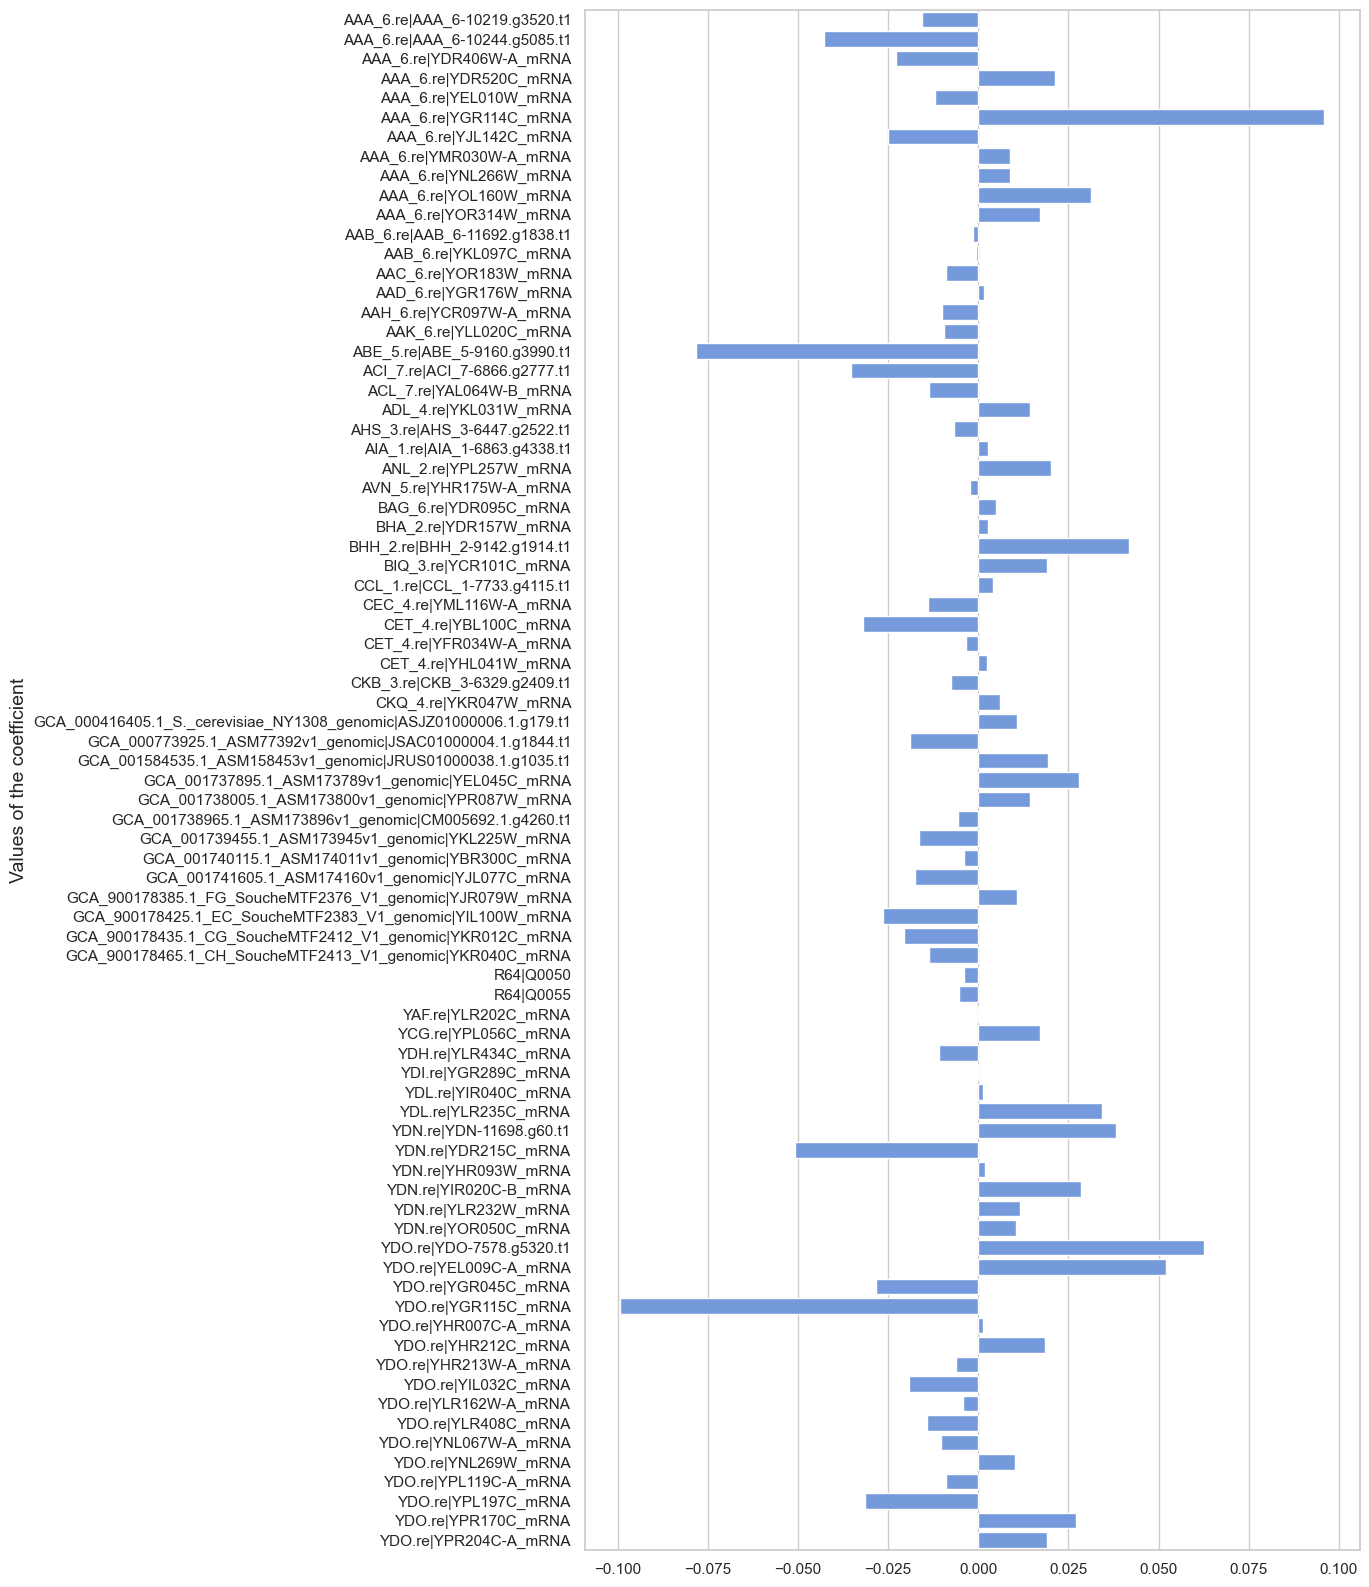

In [239]:
# Visualizing coefficients

fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(y =X.columns, x=lin_reg.coef_, color='cornflowerblue')
ax.set_ylabel('Values of the coefficient', size=14)
# ax.set_xticklabels(X.columns, rotation=45)

# Ridge Regression

Text(0.5, 1.0, 'Heatmap of Features')

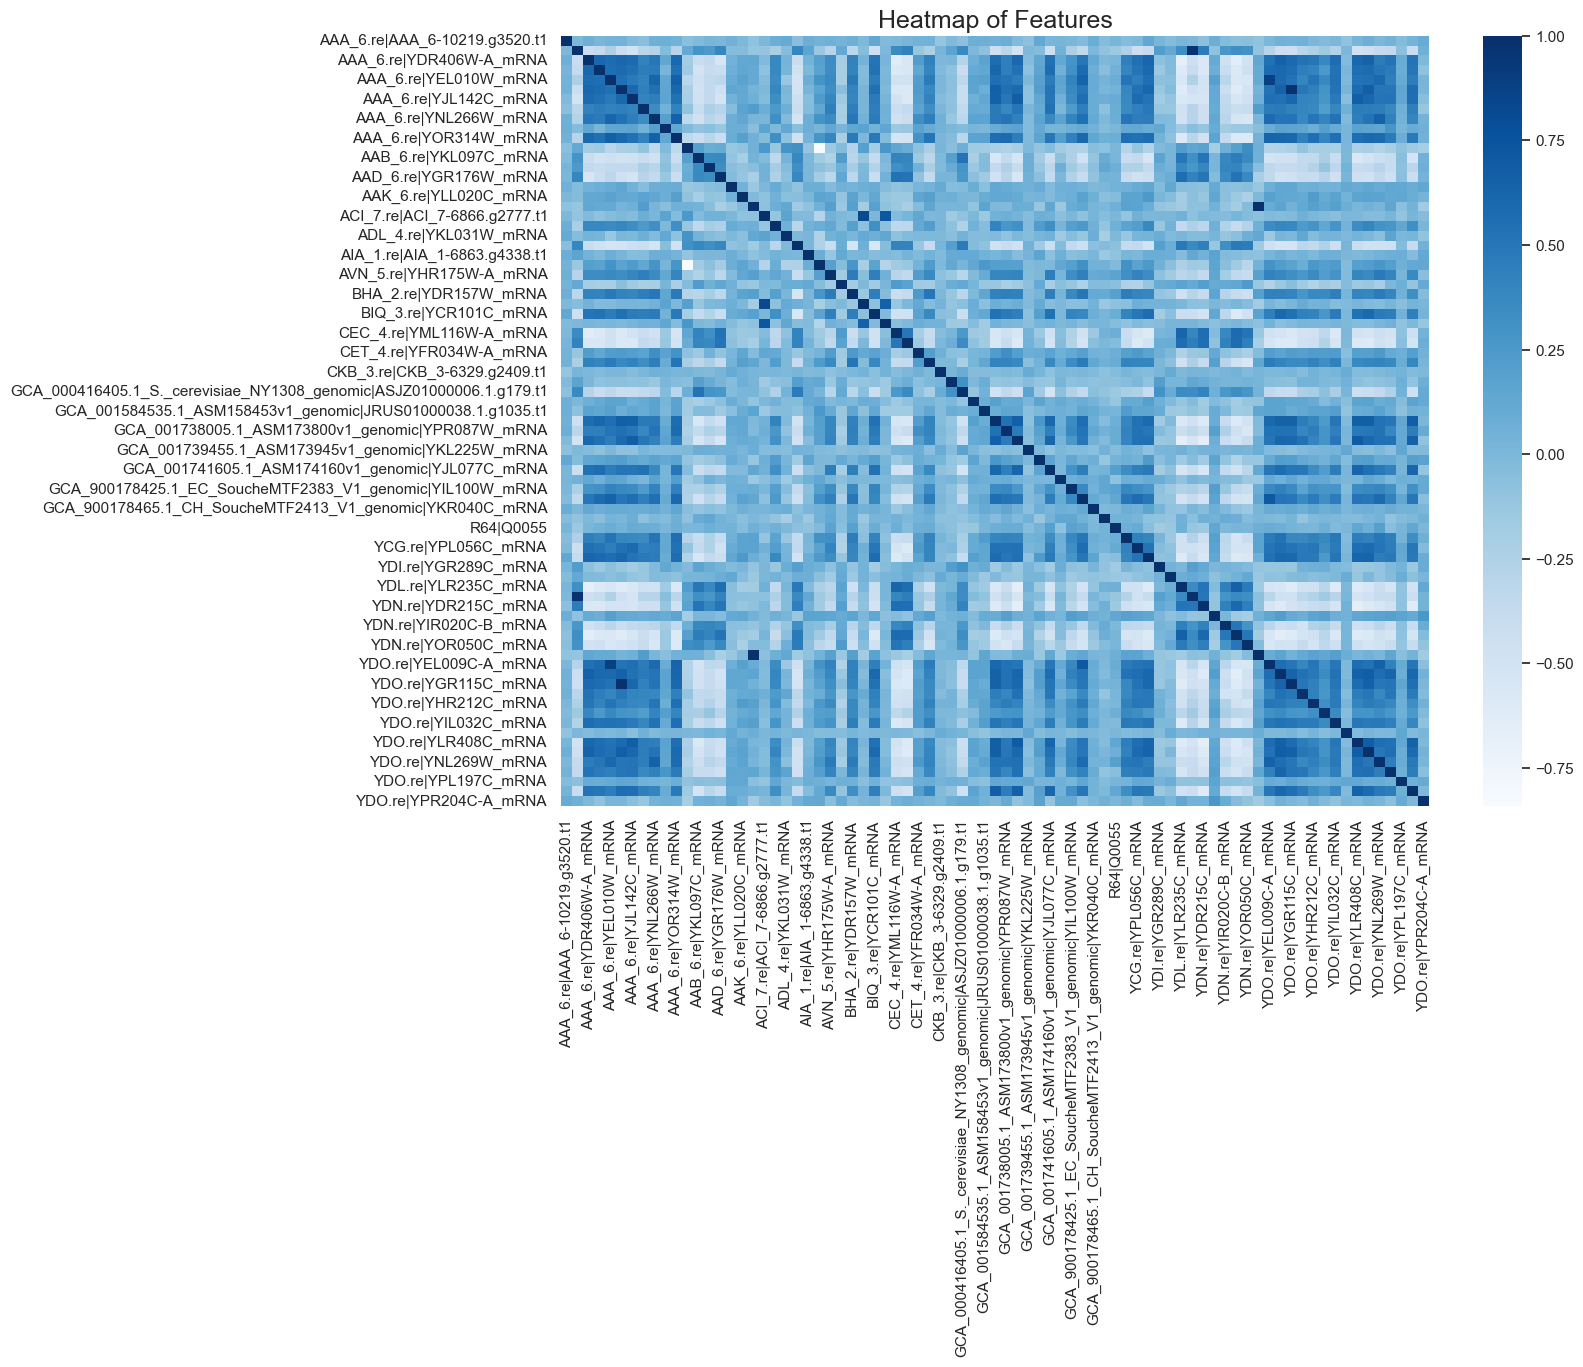

In [240]:
from scipy.spatial.distance import pdist, squareform

#pdist calculates pairwise distances between rows 
corr_mat = squareform(pdist(X.T, 'correlation'))
corr_mat = 1 - corr_mat
corr_df = pd.DataFrame(data=corr_mat, columns=X.columns, index=X.columns)

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(data = corr_df, ax=ax, cmap='Blues')
ax.set_title('Heatmap of Features', size=18)

In [241]:
from sklearn.linear_model import Ridge

alpha=100
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(Xtrain, ytrain)

Ridge(alpha=100)

In [242]:
ypred_train = ridge_reg.predict(Xtrain)
ypred_test = ridge_reg.predict(Xtest)

print('Training Set:')
score(ytrain, ypred_train)

print('Test Set:')
score(ytest, ypred_test)

Training Set:
R2 score: 0.16
Mean Squared Error: 0.01
Test Set:
R2 score: 0.07
Mean Squared Error: 0.02


Text(0, 0.5, 'Values of the coefficient')

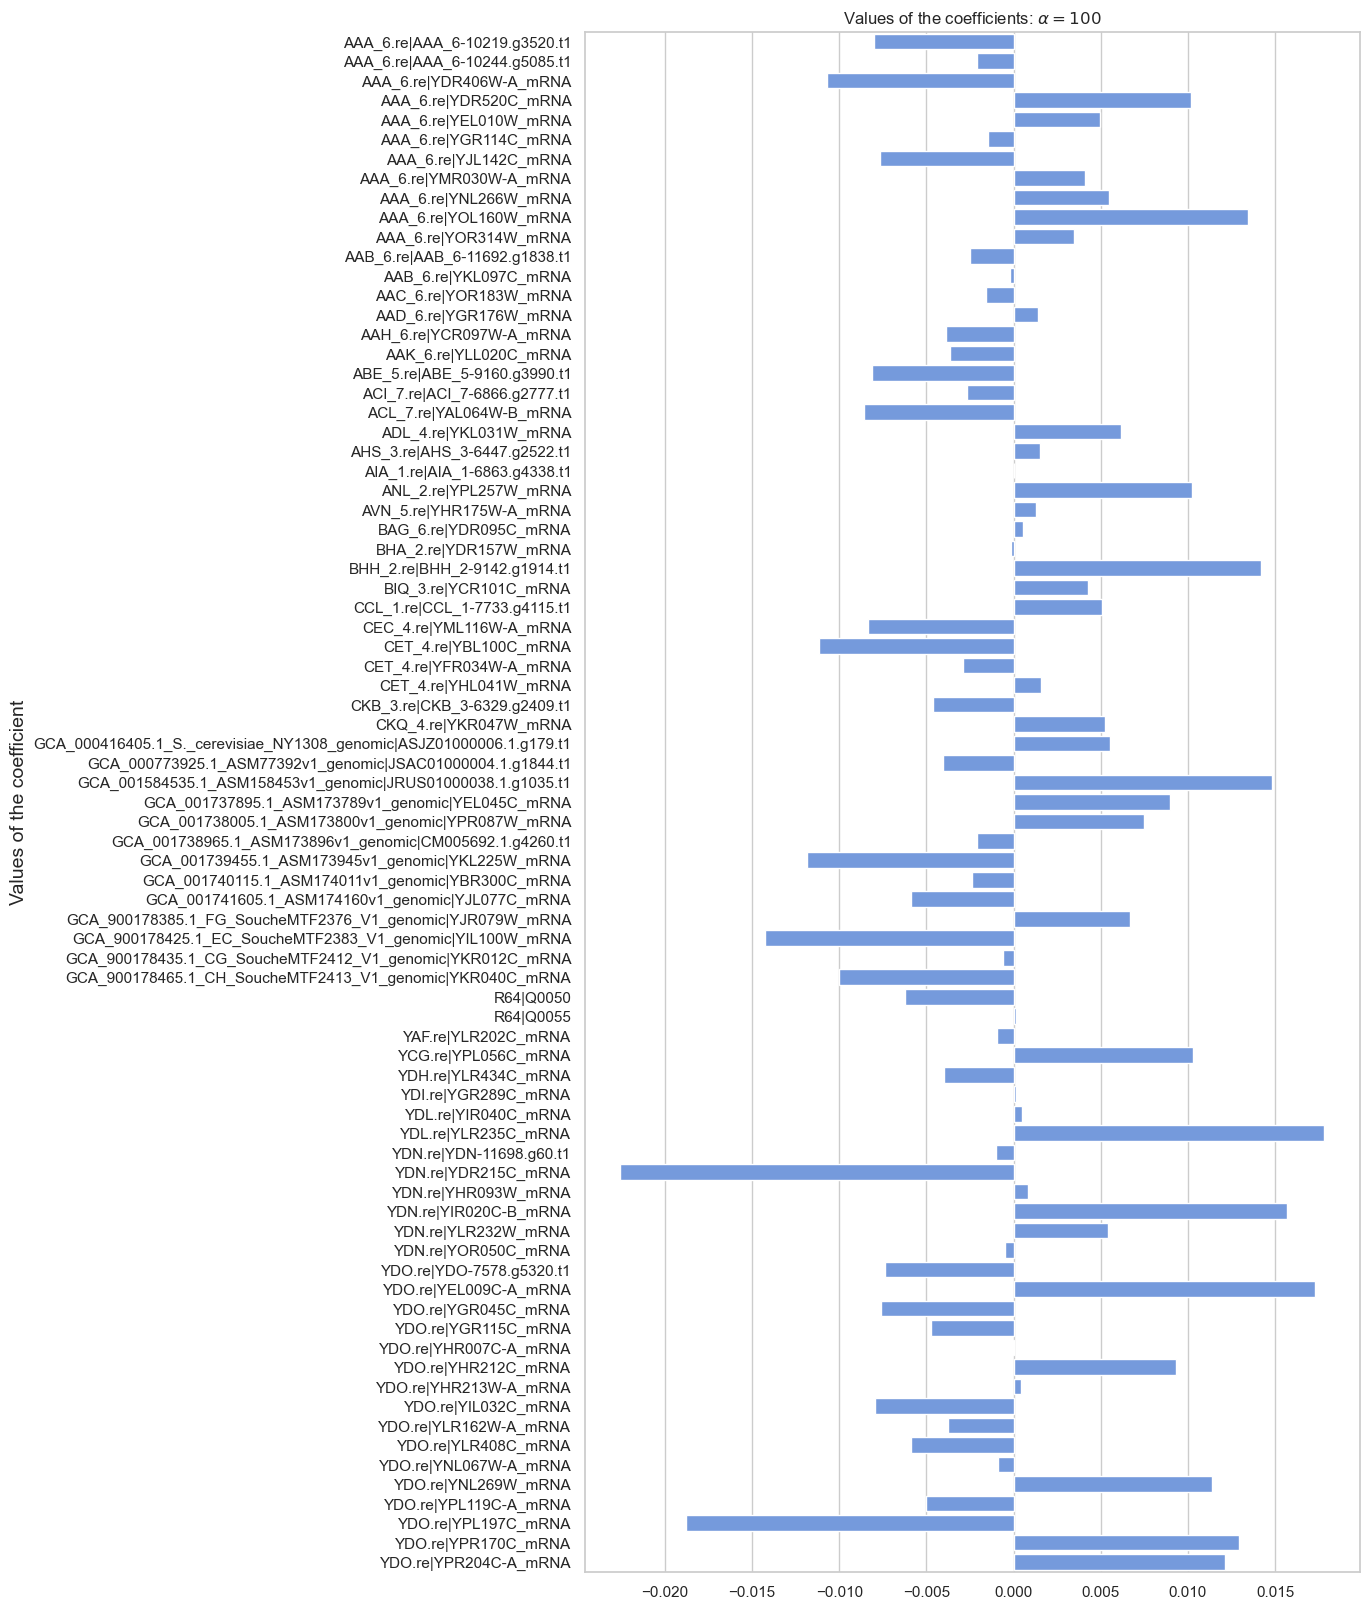

In [243]:
fig, ax = plt.subplots(figsize=(10,20))
# top_features = np.where(np.abs(ridge_reg.coef_) > np.quantile(ridge_reg.coef_, 0.995))
sns.barplot(y =X.columns, x=ridge_reg.coef_, color='cornflowerblue')
ax.set_title(r'Values of the coefficients: $\alpha= {}$'.format(alpha))
ax.set_ylabel('Values of the coefficient', size=14)

# LASSO

In [244]:
from sklearn.linear_model import Lasso

alpha = 0.0005
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(Xtrain, ytrain)

Lasso(alpha=0.0005)

In [245]:
ypred_train = lasso_reg.predict(Xtrain)
ypred_test = lasso_reg.predict(Xtest)

print('Training Set:')
score(ytrain, ypred_train)

print('Test Set:')
score(ytest, ypred_test)

Training Set:
R2 score: 0.19
Mean Squared Error: 0.01
Test Set:
R2 score: 0.05
Mean Squared Error: 0.02


Text(0, 0.5, 'Values of the coefficient')

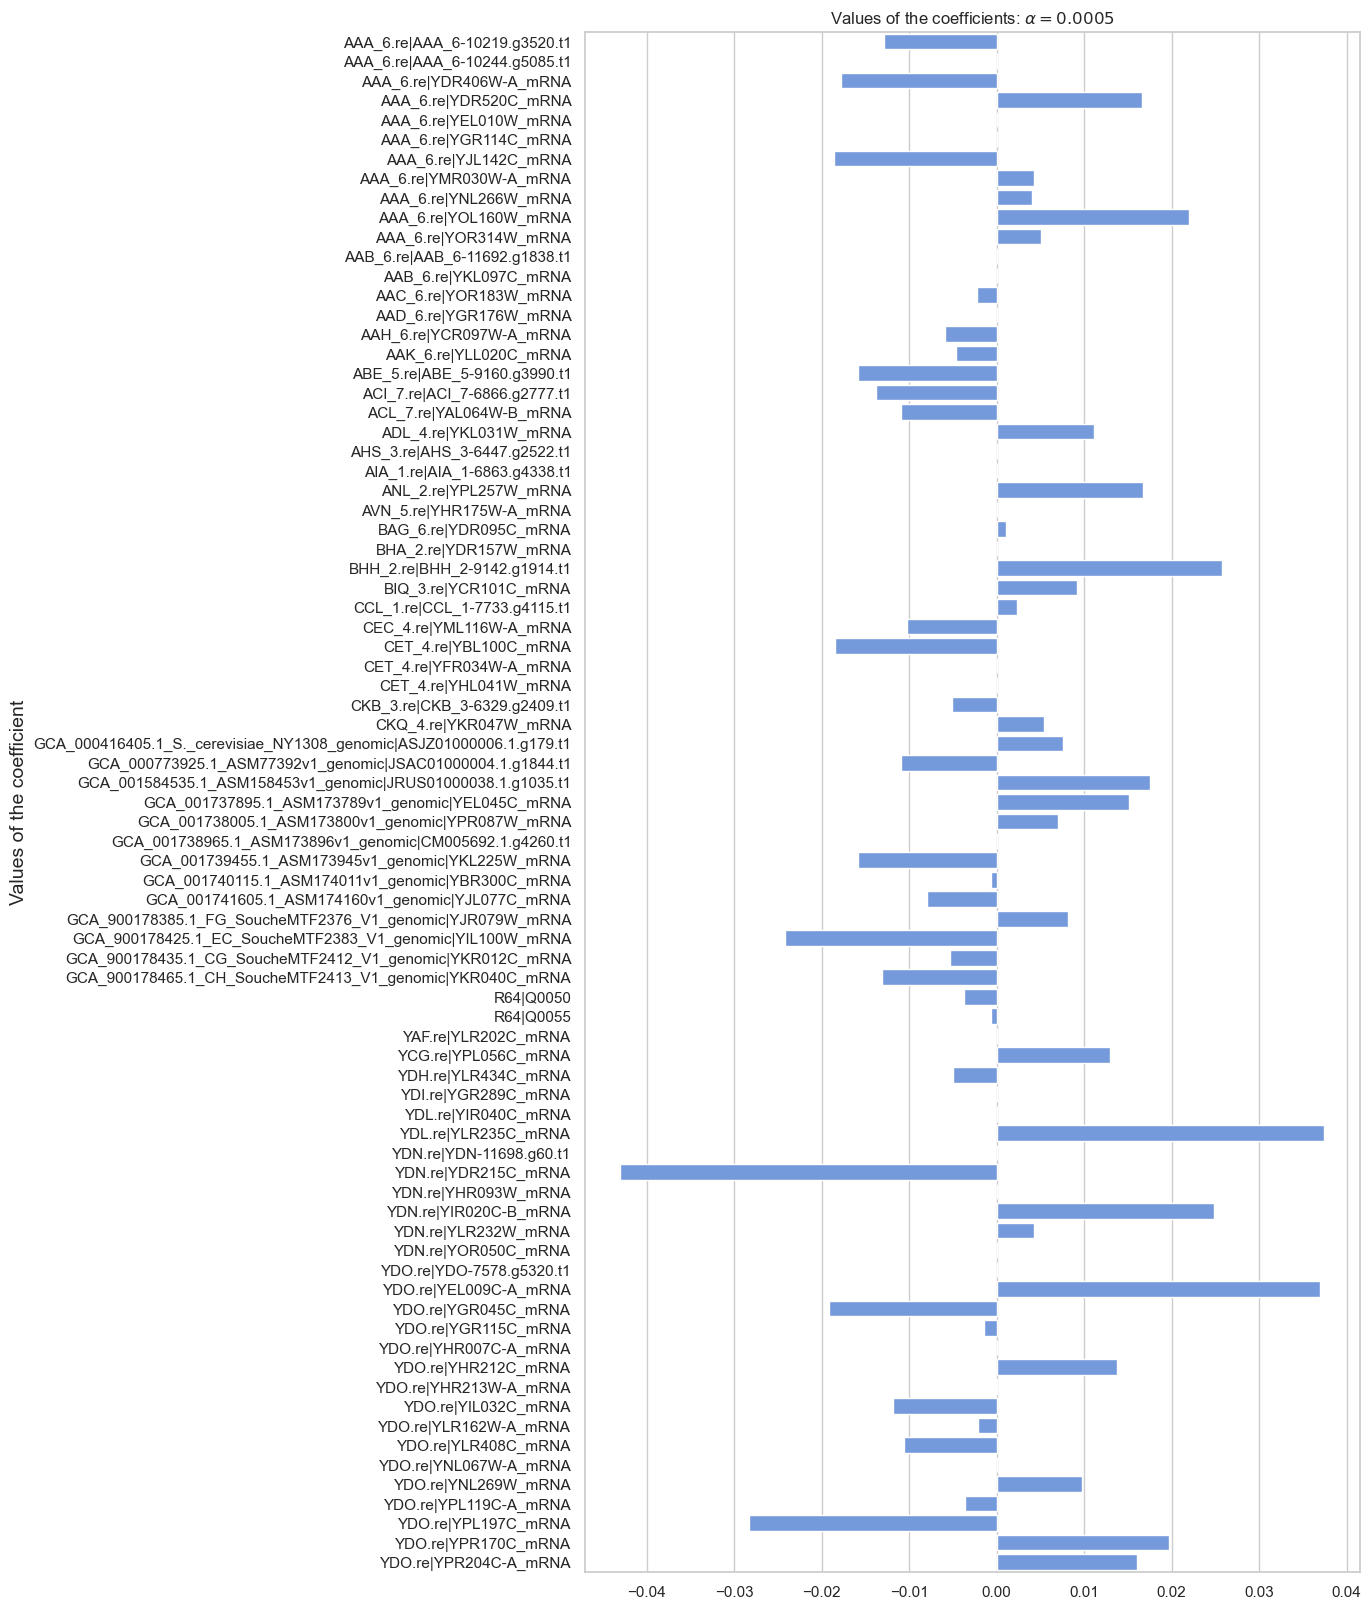

In [246]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(y =X.columns, x=lasso_reg.coef_, color='cornflowerblue')
ax.set_title(r'Values of the coefficients: $\alpha= {}$'.format(alpha))
ax.set_ylabel('Values of the coefficient', size=14)

# Bias Variance Tradeoff

Text(0, 0.5, 'y')

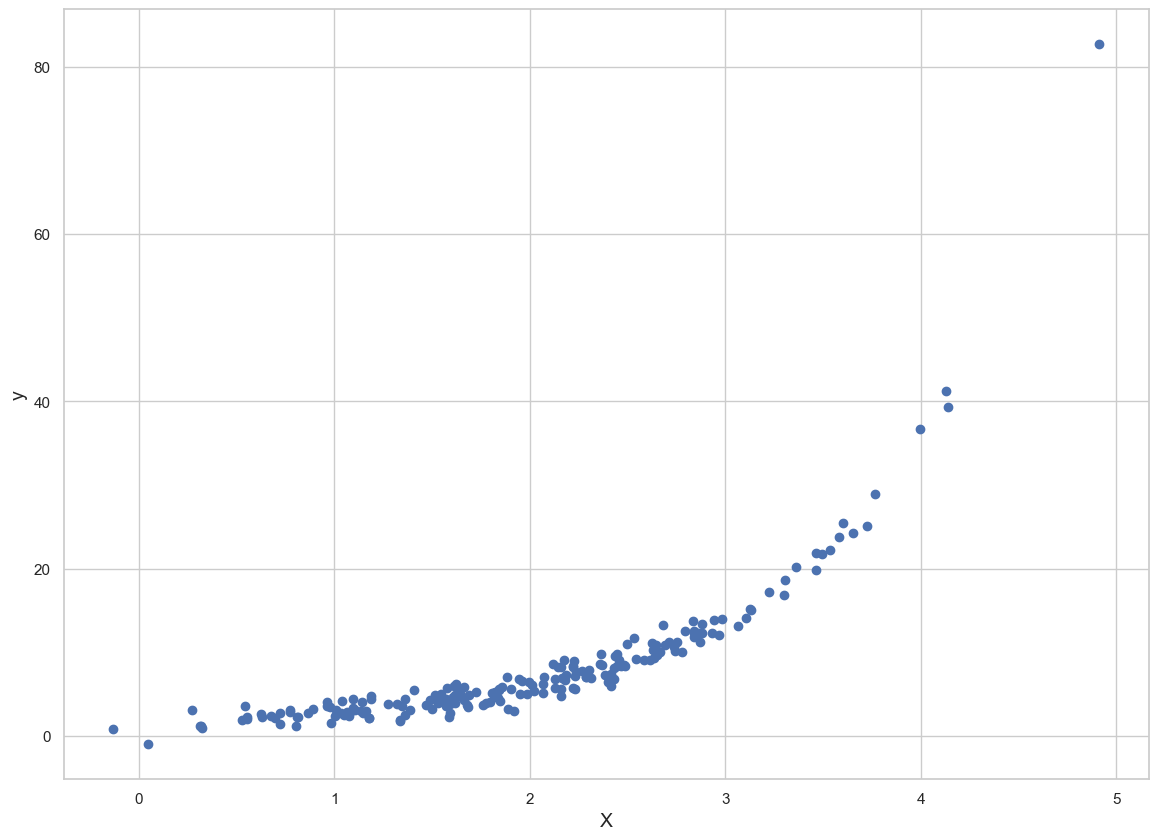

In [247]:
df2 = pd.read_csv('Dataset2_train.csv')
X = df2.X
y = df2.y

plt.scatter(X,y)
plt.xlabel('X', size=14)
plt.ylabel('y', size=14)

In [248]:
from numpy.polynomial.polynomial import Polynomial

pol = Polynomial.fit(X,y,deg = 0)

In [249]:
print(pol)

8.03930489


In [250]:
# One can predict just by using pol(number)

# pol(4)
# pol(5)

In [251]:
#Importing test data

df2 = pd.read_csv('Dataset2_test.csv')
Xtest = df2.X
ytest = df2.y

In [252]:
degrees = np.arange(0,11)
train_error = []
test_error = []

for degree in degrees:
    pol = Polynomial.fit(X, y, deg=degree)
    
    train_error.append(np.sqrt(mean_squared_error(y, pol(X))))
    test_error.append(np.sqrt(mean_squared_error(ytest, pol(Xtest))))

Text(0.5, 0.98, 'The Bias-Variance Tradeoff')

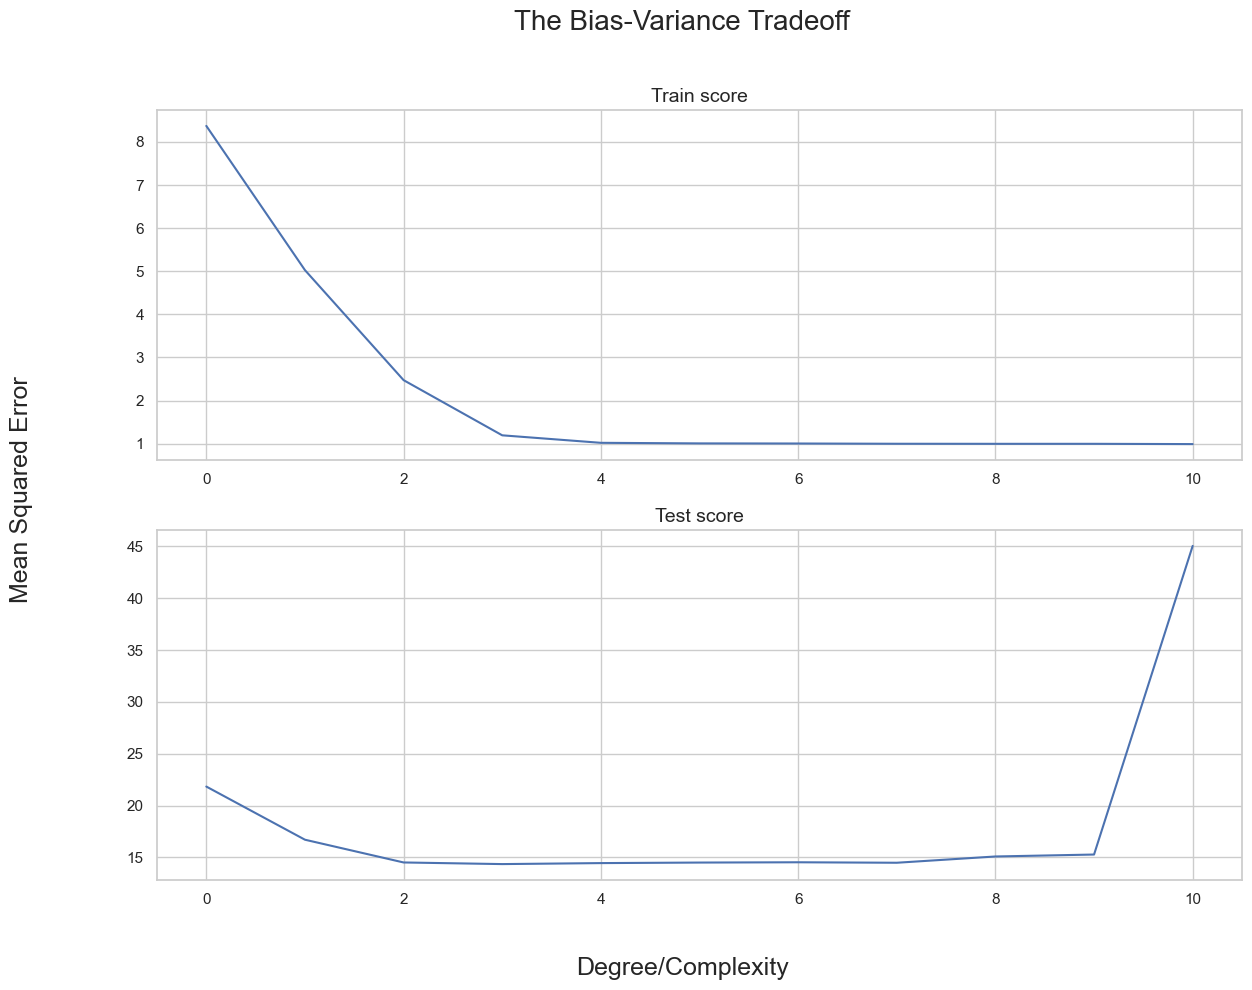

In [253]:
fig, ax = plt.subplots(2,1)
ax[0].plot(degrees, train_error, label='Train score',)
ax[0].set_title('Train score', size=14)
ax[1].plot(degrees, test_error, label='Test score')
ax[1].set_title('Test score', size=14)
fig.supxlabel('Degree/Complexity', size=18)
fig.supylabel('Mean Squared Error', size=18)
fig.suptitle('The Bias-Variance Tradeoff', size=20)